## 1. Transportation Problem

### Problem Statement

**SandyCo Problem Background:**
- SandyCo has 2 facilities that mine, clean, and sort sand for use in cement, children’s playboxes, and small beaches. They distribute sand from their two plants to three different customer regions where it is packaged and sold.
- Each plant has a specific maximum weekly supply of available sand and each region has an expected minimum weekly required demand. The cost to distribute a ton of sand differs between each plant and region pairing due to distance and other factors.

**Problem Objective:**
- How much sand should SandyCo ship from each plant to each region each week to meet demand at the lowest planned distribution costs?


### Introduction
The transportation problem is a type of network optimisation problem where the objective is to determine the most cost-effective way to transport goods from multiple suppliers to multiple consumers. Each supplier has a certain supply capacity, and each consumer has a certain demand requirement. The goal is to minimise the total transportation cost while satisfying all supply and demand constraints.

**Problem Definition:**
- **Suppliers (Plants):** Locations where goods are produced.
- **Consumers (Regions):** Locations where goods are needed.
- **Supply:** The amount of goods available at each supplier.
- **Demand:** The amount of goods required at each consumer.
- **Transportation Cost:** The cost to transport goods from a supplier to a consumer.

**Constraints:**
- Supply constraints: The total amount of goods shipped from each supplier should not exceed its available supply.
- Demand constraints: The total amount of goods received by each consumer should meet its demand.
- Non-negativity constraints: The number of goods transported should be non-negative.

**Objective Function:**
The objective is to minimise the total transportation cost.

### Model Formulation
To formulate the transportation problem as a linear programming model, we define the following:

**Indices:**
- $ i $ = Supplier index
- $ j $ = Consumer index

**Decision Variables:**
- $ x_{ij} $ = Amount of goods transported from supplier $ i $ to consumer $ j $

**Parameters:**
- $ S_i $ = Supply capacity of supplier $ i $
- $ D_j $ = Demand requirement of consumer $ j $
- $ c_{ij} $ = Cost of transporting one unit of goods from supplier $ i $ to consumer $ j $

**Objective Function:**
$$\min z: \sum_{i} \sum_{j} c_{ij} x_{ij}$$
**Constraints:**
1. Supply constraints:
$\sum_{j} x_{ij} \leq S_i \quad \forall i$
2. Demand constraints:
$\sum_{i} x_{ij} \geq D_j \quad \forall j$
3. Non-negativity constraints:
$x_{ij} \geq 0 \quad \forall i, j$


### Python Implementation
We'll now illustrate the implementation of the transportation problem using Python. We'll use the `PuLP` library, which is a linear programming toolkit for Python.

#### Step-by-Step Implementation:

1. **Install PuLP:**
   If you haven't already installed PuLP, you can do so using pip:
   ```bash
   pip install pulp
   ```

#### 2. Formulate the Problem in Python

We are going to define a function `solve_transportation_problem` that utilises the `pulp` and `pandas` libraries to solve the transportation problem. This function is essential as it formulates the problem using linear programming techniques, defines the decision variables, and sets up the objective function and constraints. By solving the problem, the function generates optimal transportation plans that minimise costs. The results, including the quantities transported from each supplier to each consumer and the total cost, are organised into a DataFrame for easy analysis and interpretation.

In [20]:
import pulp
import pandas as pd

def solve_transportation_problem(supply, demand, cost):
    # Define the problem
    problem = pulp.LpProblem("Transportation_Problem", pulp.LpMinimize)

    # Define decision variables
    num_suppliers = len(supply)
    num_consumers = len(demand)
    x = pulp.LpVariable.dicts("x", (range(num_suppliers), range(num_consumers)), lowBound=0, cat='Continuous')

    # Objective function
    problem += pulp.lpSum([x[i][j] * cost[i][j] for i in range(num_suppliers) for j in range(num_consumers)])

    # Supply constraints
    for i in range(num_suppliers):
        problem += pulp.lpSum([x[i][j] for j in range(num_consumers)]) <= supply[i]

    # Demand constraints
    for j in range(num_consumers):
        problem += pulp.lpSum([x[i][j] for i in range(num_suppliers)]) >= demand[j]

    # Solve the problem
    problem.solve()

    # Collect the results
    results = []
    for i in range(num_suppliers):
        for j in range(num_consumers):
            results.append([i+1, j+1, x[i][j].varValue])
    
    df = pd.DataFrame(results, columns=['Supplier', 'Consumer', 'Amount'])
    
    return df, pulp.value(problem.objective)

#### Define the supply, demand, and cost data


In [21]:
supply = [100, 125]
demand = [25, 95, 80]
cost = [
    [250, 325, 445],
    [275, 260, 460]
]

# Call the function and get the results in a DataFrame
solution_df, total_cost = solve_transportation_problem(supply, demand, cost)
print(solution_df)
print("Total Cost:", total_cost)

   Supplier  Consumer  Amount
0         1         1    25.0
1         1         2     0.0
2         1         3    75.0
3         2         1     0.0
4         2         2    95.0
5         2         3     5.0
Total Cost: 66625.0


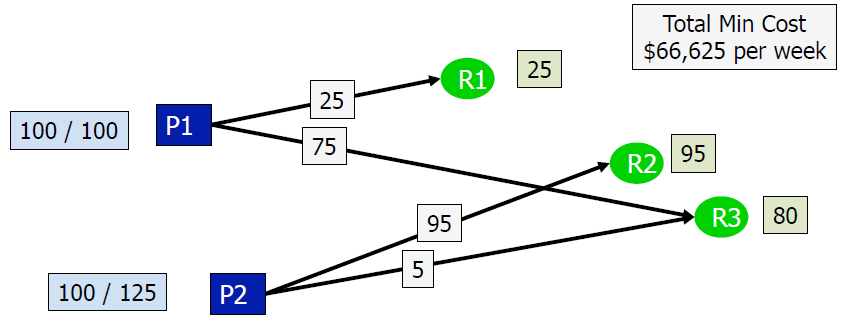

### Visualisation of Transportation Problem Solution

We are going to define a function `plot_results` that uses the `matplotlib` and `seaborn` libraries to create a bar plot to visualise the solution to the transportation problem. Defining this function is important as it encapsulates the visualisation logic, making it reusable and easy to call whenever needed. The plot displays the amount of goods transported from multiple suppliers to various consumers, with each bar representing the quantity delivered. The bars are colour-coded by supplier, and the total transportation cost is prominently displayed in the title. This visualisation provides a clear and intuitive understanding of the distribution of goods and the associated costs, facilitating better decision-making in supply chain management.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(df, total_cost):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a bar plot using seaborn
    sns.barplot(data=df, x='Consumer', y='Amount', hue='Supplier', palette='tab10', ax=ax)

    plt.title(f'Transportation Problem Solution\nTotal Cost: {total_cost}')
    plt.xlabel('Consumer')
    plt.ylabel('Amount')
    plt.legend(title='Suppliers')
    plt.show()

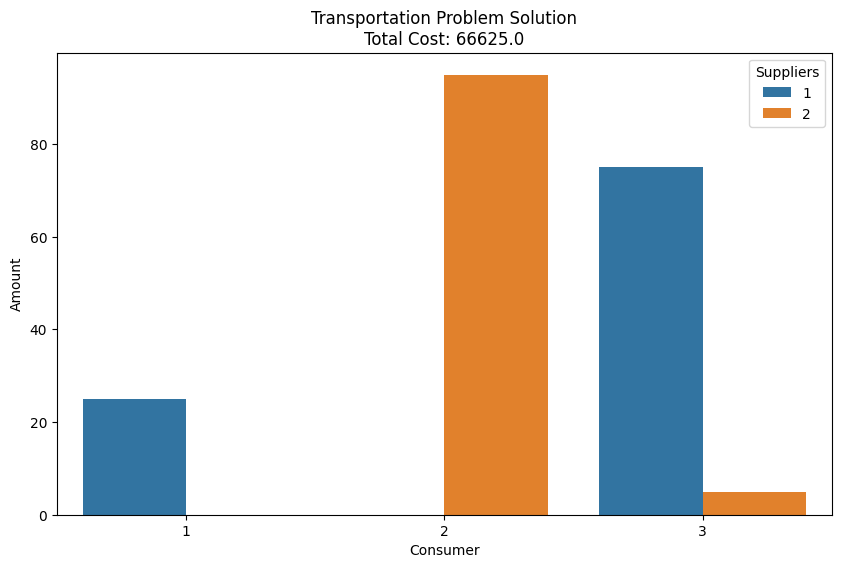

In [23]:
# Plot the results
plot_results(solution_df, total_cost)